In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("E:/Data Scientist/Datasets/diabetes1.csv")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Basic Checks

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1) No missing values
2) 0 value not possible for glucose,BP,skin thickness and insulin.This is called as data corruption

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Domain Analysis 
# Description about the column

1)Pregnancies:-Some women have diabetes before they get pregnant. This is called pregestational diabetes. Other women may get a type of diabetes that only happens in pregnancy. This is called gestational diabetes. Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.
If you have gestational diabetes during pregnancy, generally your blood sugar returns to its usual level soon after delivery. But if you've had gestational diabetes, you have a higher risk of getting type 2 diabetes. You'll need to be tested for changes in blood sugar more often.
The risk of getting diabetes is 28% if the patient has concived more than 2 or 3 times.

2)Glucose:-Glucose is your body's source of fuel. Your pancreas makes insulin to move glucose from your bloodstream into muscle, fat, and liver cells, where your body turns it into energy. People with diabetes have too much blood sugar because their body cannot move glucose into fat, liver, and muscle cells to be changed into and stored for energy.

3)Blood Pressure:-A person with diabetes is twice as likely to have high blood pressure as someone who does not have diabetes. When you have diabetes, high blood sugar can damage your blood vessels and the nerves that help your heart pump.Similarly, high blood pressure can create increased strain on your heart and blood vessels. When these two conditions occur together, they increase the risk of heart disease (cardiovascular disease) and stroke.
High blood pressure:-  According to a 2018 article, people with high blood pressure usually have insulin resistance and have an increased risk of developing diabetes compared to those with typical blood pressure. Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.

4)Skin Thickness:-Skin thickening is frequently observed in patients with diabetes. Affected areas of skin can appear thickened, waxy, or edematous. These patients are often asymptomatic but can have a reduction in sensation and pain. Although different parts of the body can be involved, the hands and feet are most frequently involved.Diabetes can cause changes in the small blood vessels. These changes can cause skin problems called diabetic dermopathy. Dermopathy often looks like light brown, scaly patches. These patches may be oval or circular.

5)Insulin:-Insulin is a hormone your pancreas makes to lower blood glucose, or sugar. If you have diabetes, your pancreas either doesn't make enough insulin or your body doesn't respond well to it. Your body needs insulin to keep the blood sugar level in a healthy range.Type 1 diabetes causes damage to the beta cells in your pancreas that make insulin. As a result, your body can't produce enough of this hormone. Type 2 diabetes gradually makes it harder for your be

6)BMI:-Body mass index has a strong relationship to diabetes and insulin resistance. In obese individuals, the amount of nonesterified fatty acids, glycerol, hormones, cytokines, proinflammatory markers, and other substances that are involved in the development of insulin resistance, is increased. The pathogenesis in the development of diabetes is based on the fact that the β-islet cells of the pancreas are impaired, causing a lack of control of blood glucose. The development of diabetes becomes more inevitable if the failure of β-islet cells of the pancreas is accompanied by insulin resistance. Weight gain and body mass are central to the formation and rising incidence of type 1 and type 2 diabetes.

8)Age:-The prevalence of both type 2 diabetes and prediabetes increases with advancing age. The most important factors leading to hyperglycaemia are as follows: deficiency of insulin secretion developing with age, and growing insulin resistance caused by a change in body composition and sarcopaenia.The process of aging of the human body leads to impairment of energy homeostasis and abnormalities in carbohydrate metabolism. The most important causes of hyperglycaemia are thought to be deficiency of insulin secretion developing with age and growing insulin resistance.


# Exploratory Data Analysis

In [11]:
# Univariate Analysis
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

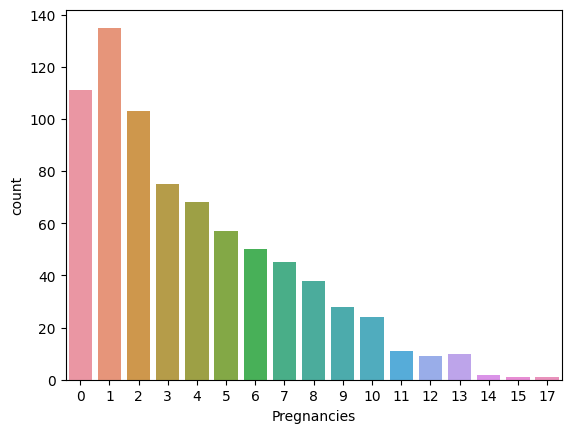

In [11]:
sns.countplot(x='Pregnancies', data=df)

In [12]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

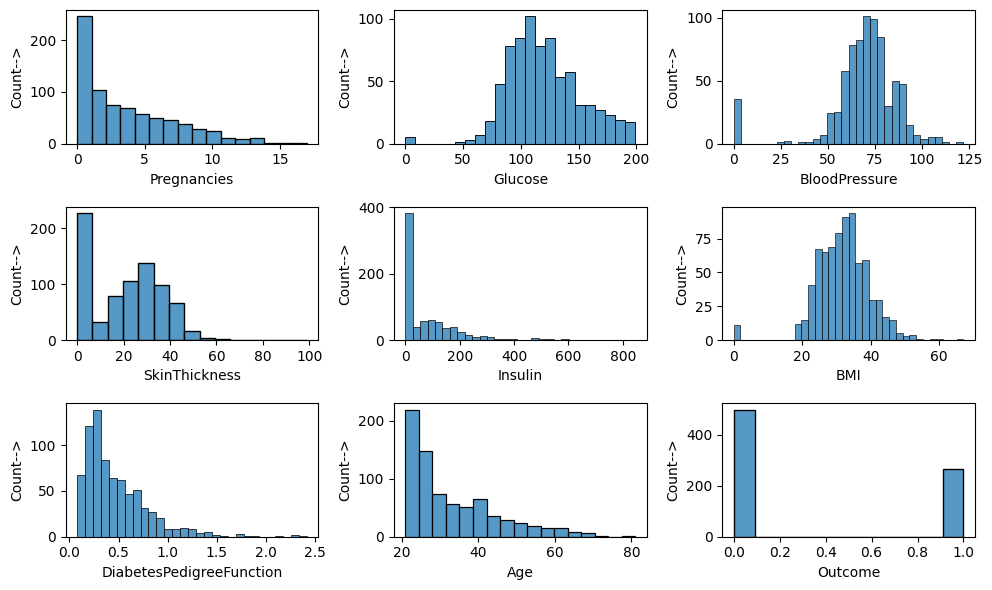

In [14]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1

for i in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[i])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Count-->',fontsize=10)
    plotnumber +=1
plt.tight_layout()
        
        
    

In [14]:
for i in df:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


<Axes: xlabel='Pregnancies', ylabel='count'>

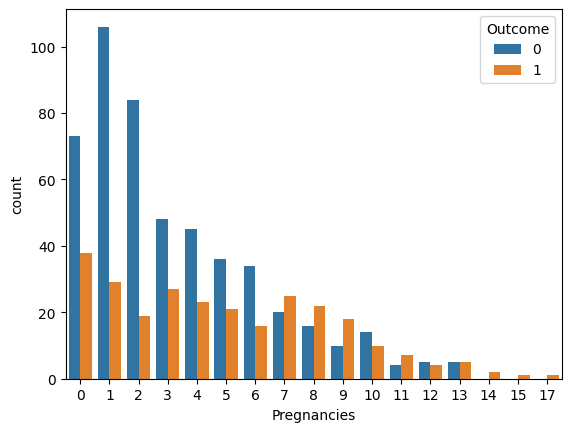

In [15]:
##Bivariate Analysis refers to plots between input variables and target variables.
sns.countplot(x='Pregnancies',hue='Outcome', data=df)

1) If the pateint is preganent,she will get diabetes.But after analyzing this data,we found as the no of pregnenacy increases chances of getting diabetes also increases.
2) At from 14 to 17 pregnancies all women are diabetic.

<Axes: xlabel='Glucose', ylabel='Count'>

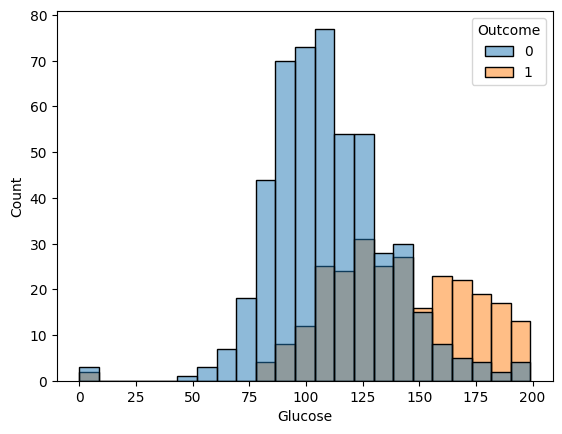

In [15]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=df)

C:\Python11x\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


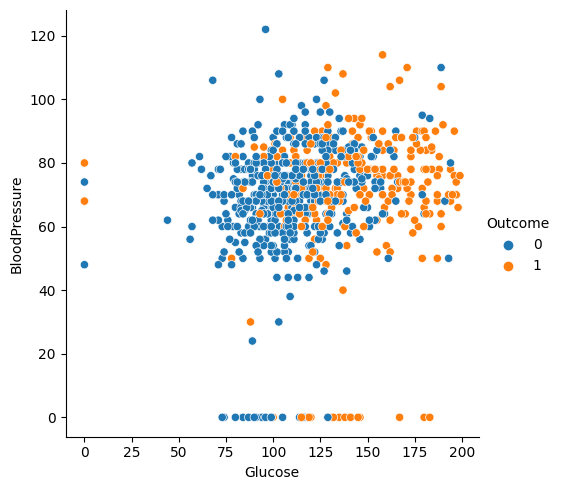

In [18]:
## Analyze Glucose with blood pressure
sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
plt.show()

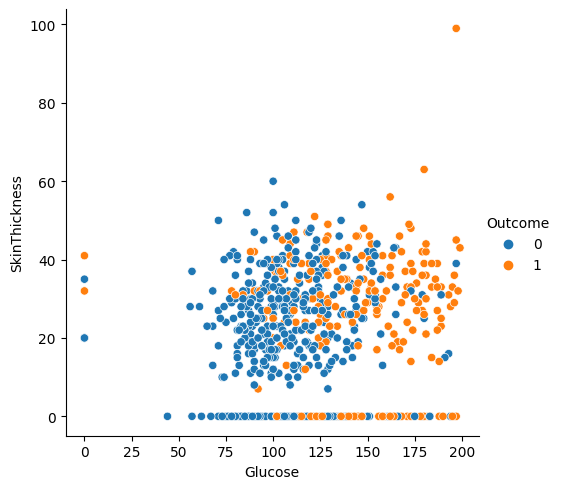

In [16]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=df)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

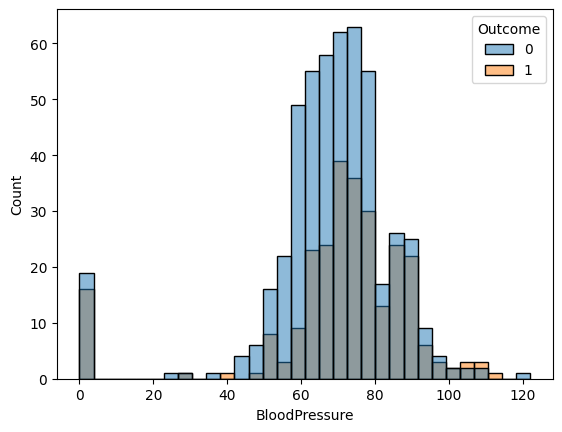

In [20]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=df)

# Data Preprocessing and Feature Engineering

In [17]:
df.isnull().sum() # to chk null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.Glucose.replace(0,np.median(df.Glucose),inplace=True)
                   

In [19]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [21]:
df.BloodPressure.replace(0,np.median(df.BloodPressure),inplace=True)
df.SkinThickness.replace(0,np.median(df.SkinThickness),inplace=True)
df.Insulin.replace(0,np.median(df.Insulin),inplace=True)
df.BMI.replace(0,np.median(df.BMI),inplace=True)

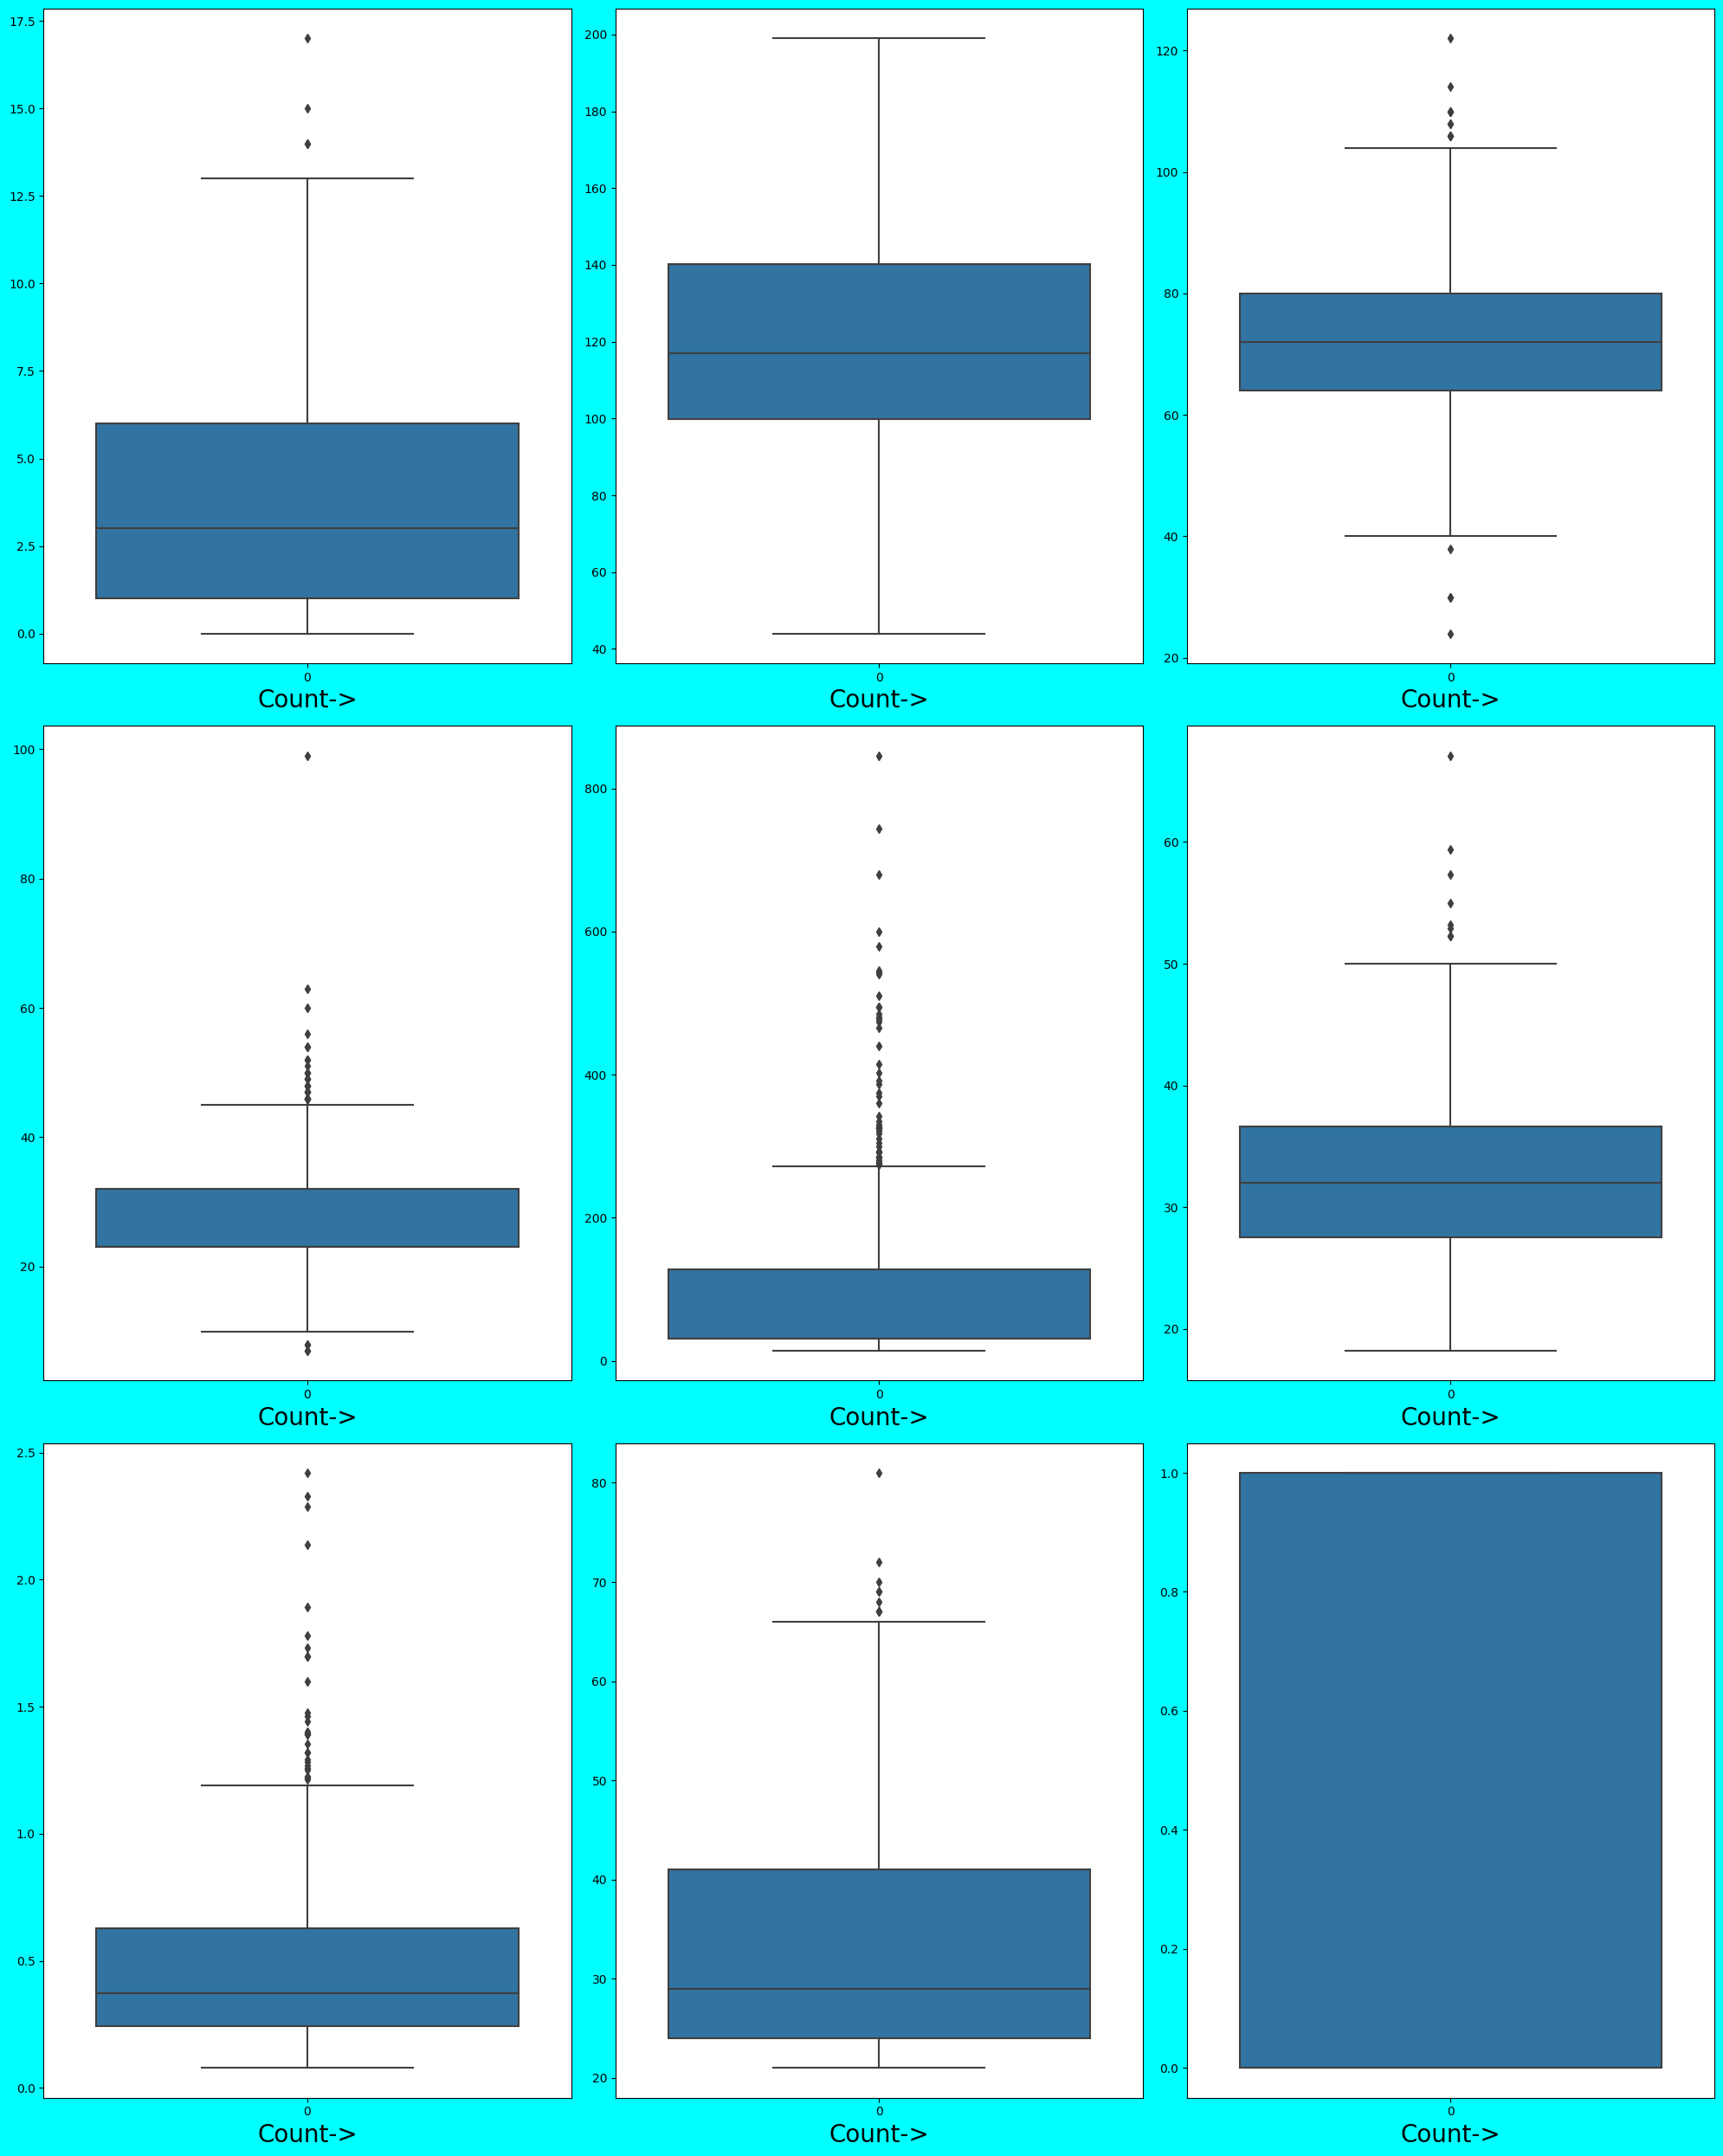

In [25]:
# checking outliers
plt.figure(figsize=(20,25), facecolor='Cyan')
plotnumber=1

for column in df:
    if (plotnumber<=9):
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.xlabel('Count->',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [26]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(df.drop(dl,axis=1))

Machine learning models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the domain may be different for each variable.

Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization 
This difference in scale for input variables does not affect all machine learning algorithms.

For example, algorithms that fit a model that use a weighted sum of input variables are affected, such as linear regression, logistic regression, and artificial neural networks (deep learning).error.

In [27]:
con_data=df[['Pregnancies','Outcome']]


In [28]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
type(data1)

numpy.ndarray

In [30]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])    # coverting to data frame again

In [31]:
final_df=pd.concat([data2,con_data],axis=1)

In [32]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


# Feature Selection


<Axes: >

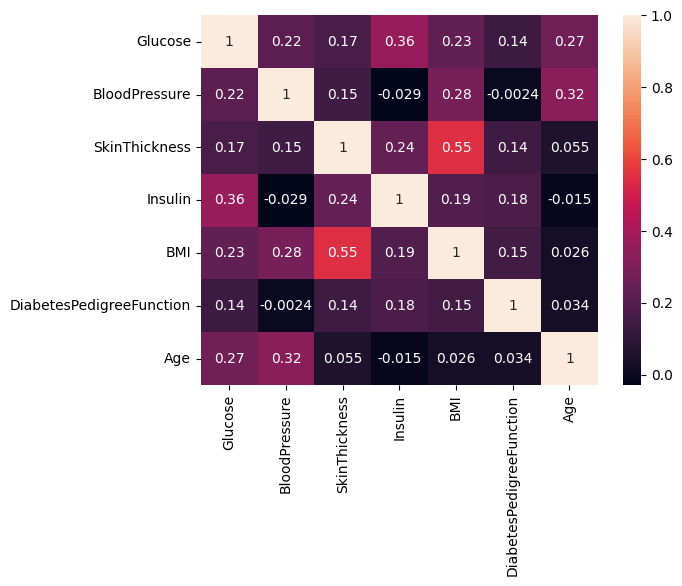

In [33]:
sns.heatmap(data2.corr(),annot=True)

# Model Creation

In [34]:
X=final_df.iloc[:,:-1]
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0


In [35]:
y=final_df.Outcome

In [36]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [38]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [39]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)


LogisticRegression()

In [40]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
y_pred_prob=clf.predict_proba(X_test)

In [42]:
y_pred_prob

array([[0.33743389, 0.66256611],
       [0.90164492, 0.09835508],
       [0.740058  , 0.259942  ],
       [0.53963051, 0.46036949],
       [0.81026035, 0.18973965],
       [0.85484529, 0.14515471],
       [0.54407058, 0.45592942],
       [0.9242643 , 0.0757357 ],
       [0.36227241, 0.63772759],
       [0.91519934, 0.08480066],
       [0.24509263, 0.75490737],
       [0.53439685, 0.46560315],
       [0.94236849, 0.05763151],
       [0.44039766, 0.55960234],
       [0.73456378, 0.26543622],
       [0.90467069, 0.09532931],
       [0.06517116, 0.93482884],
       [0.60883675, 0.39116325],
       [0.38320038, 0.61679962],
       [0.91370945, 0.08629055],
       [0.65556596, 0.34443404],
       [0.7178171 , 0.2821829 ],
       [0.57393877, 0.42606123],
       [0.82546245, 0.17453755],
       [0.7988021 , 0.2011979 ],
       [0.36473673, 0.63526327],
       [0.8577693 , 0.1422307 ],
       [0.33566192, 0.66433808],
       [0.22691992, 0.77308008],
       [0.83253213, 0.16746787],
       [0.

In [43]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Evaluation of Classification Matrix
Evaluation of a Classification Model
In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is? For a regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values. In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted. The different metrics used for this purpose are:

Accuracy
Recall
Precision
F1 Score
Specifity
AUC( Area Under the Curve)
ROC(Receiver Operator Characteristic)
Classification Report
Confusion Matrix
A typical confusion matrix looks like the figure shown.

Image
Where the terms have the meaning:

 True Positive(TP): A result that was predicted as positive by the classification model and also is positive

 True Negative(TN): A result that was predicted as negative by the classification model and also is negative

 False Positive(FP): A result that was predicted as positive by the classification model but actually is negative

 False Negative(FN): A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

Accuracy
The mathematical formula is :

Accuracy= 
 

Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications. Its is not the correct for inbalanc data beacause its always show you high accurancy becoz its bais to the high count data in binary classification becoz its not calculate the error / its won't count the error

Recall or Sensitivity
The mathematical formula is:

Recall= 
 

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Consider a classification model , the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall=
 
= 0.2 (The model was able to recall only 20% of the cancer patients)

Precision
Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=
 

Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a false alarm for 100 patients(FP). Hence,

Precision=
 
=0.33 (The model only has a precision of 33%)

But we have a problem!!
As evident from the previous example, the model had a very high Accuracy but performed poorly in terms of Precision and Recall. So, necessarily Accuracy is not the metric to use for evaluating the model in this case.

Imagine a scenario, where the requirement was that the model recalled all the defaulters who did not pay back the loan. Suppose there were 10 such defaulters and to recall those 10 defaulters, and the model gave you 20 results out of which only the 10 are the actual defaulters. Now, the recall of the model is 100%, but the precision goes down to 50%.

A Trade-off?
Image
As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting cancer, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an F1 Score

F1 Score
From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall.

The mathematical formula is: F1 score= 
 

Specificity or True Negative Rate
This represents how specific is the model while predicting the True Negatives. Mathematically,

Specificity=
 
 Or, it can be said that it quantifies the total number of negatives predicted by the model with respect to the total number of actual negative or non favorable outcomes.

Similarly, False Positive rate can be defined as: (1- specificity) Or, 
 

ROC(Receiver Operator Characteristic)
We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome.

Now, the question is, what should be an ideal threshold?

The following diagram shows a typical logistic regression curve. Image

The horizontal lines represent the various values of thresholds ranging from 0 to 1.
Let’s suppose our classification problem was to identify the obese people from the given data.
The green markers represent obese people and the red markers represent the non-obese people.
Our confusion matrix will depend on the value of the threshold chosen by us.
For Example, if 0.25 is the threshold then TP(actually obese)=3 TN(Not obese)=2 FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line) FN(Obese but predicted as not obese )=1(Green circle below 0.25line )
A typical ROC curve looks like the following figure. Image

Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
The green dotted line represents the scenario when the true positive rate equals the false positive rate.
As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
After some time, the false positive rate becomes zero.
The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
The ROC curve answers our question of which threshold to choose.
But we have a confusion!!
Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted. The question is: which algorithm to choose now? The answer is to calculate the area under each ROC curve.

AUC(Area Under Curve)
Image
It helps us to choose the best model amongst the models for which we have plotted the ROC curves
The best model is the one which encompasses the maximum area under it.
In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one
When to use recall and when to you precision
We have thousands of free customers registering in our website every week. The call center team wants to call them all, but it is imposible, so they ask me to select those with good chances to be a buyer (with high temperature is how we refer to them). We don't care to call a guy that is not going to buy (so precision is not important) but for us is very important that all of them with high temperature are always in my selection, so they don't go without buying. That means that my model needs to have a high recall, no matter if the precision goes to hell.



In [44]:
y_pred_prob

array([[0.33743389, 0.66256611],
       [0.90164492, 0.09835508],
       [0.740058  , 0.259942  ],
       [0.53963051, 0.46036949],
       [0.81026035, 0.18973965],
       [0.85484529, 0.14515471],
       [0.54407058, 0.45592942],
       [0.9242643 , 0.0757357 ],
       [0.36227241, 0.63772759],
       [0.91519934, 0.08480066],
       [0.24509263, 0.75490737],
       [0.53439685, 0.46560315],
       [0.94236849, 0.05763151],
       [0.44039766, 0.55960234],
       [0.73456378, 0.26543622],
       [0.90467069, 0.09532931],
       [0.06517116, 0.93482884],
       [0.60883675, 0.39116325],
       [0.38320038, 0.61679962],
       [0.91370945, 0.08629055],
       [0.65556596, 0.34443404],
       [0.7178171 , 0.2821829 ],
       [0.57393877, 0.42606123],
       [0.82546245, 0.17453755],
       [0.7988021 , 0.2011979 ],
       [0.36473673, 0.63526327],
       [0.8577693 , 0.1422307 ],
       [0.33566192, 0.66433808],
       [0.22691992, 0.77308008],
       [0.83253213, 0.16746787],
       [0.

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,f1_score,classification_report,recall_score,roc_auc_score,roc_curve

In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[113,  17],
       [ 31,  31]], dtype=int64)

In [47]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Outcome,,
0,113,17
1,31,31


In [48]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [49]:
precision=precision_score(y_test,y_pred)
precision

0.6458333333333334

In [50]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.75

In [51]:
f1score=f1_score(y_test,y_pred)
f1score

0.5636363636363636

In [52]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       130
           1       0.65      0.50      0.56        62

    accuracy                           0.75       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.74      0.75      0.74       192



In [53]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64

In [54]:
roc_auc_score(y_test,y_pred)

0.6846153846153846

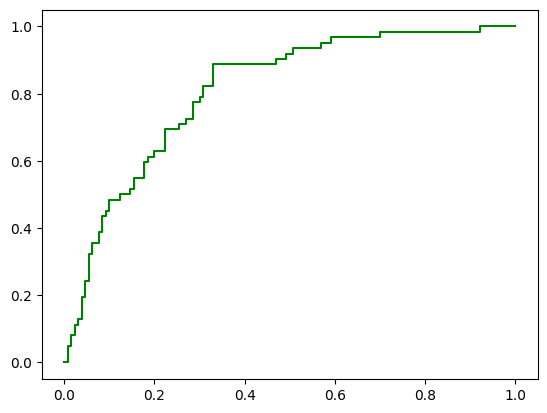

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_predic=clf.predict_proba(X_test)[:,1]
fpr,tpr,threshholds=roc_curve(y_test, y_predic)
plt.plot(fpr,tpr,color='green')
plt.show()

In [64]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64

# Multiclass Classification

In [106]:
df_iris=pd.read_csv("E:\\Data Scientist\\Datasets\\iris.csv")

In [107]:
df_iris.head()

,sepal_length,sepal_width,"petal_length,",petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
df_iris.shape

(150, 5)

In [109]:
df_iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [127]:
df_iris.isnull().sum()

sepal_length     0
sepal_width      0
petal_length,    0
petal_width      0
species          0
dtype: int64

In [128]:
X11=df_iris.iloc[:,:-1]
X1

,sepal_length,sepal_width,"petal_length,",petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [129]:
Y1=df_iris.species
print(Y1)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


 # Label encoder   and One Hot Encoder :  both Convert Categorical columnn to numerical
 ### One hot encoder is not used when number of dimension is more  so columns created will be more 

## Label Enncoder
In label Encoder first it will first order categories( here Setosa, versicolr,virginica)  in albhabetical order ad then assign category 0,1,2,...
Used when impact is unknown on target | 
For nominal variables as well ( Gender) it may be option

## One Hot Encoder 
 Depending on number of entries , here 150 it will create column for each category  | creation of new features
                                                                
          Setosa  Versicolor Verginica
 #####Setosa        1       0           0                                                       
##### Versicolor    0       1           0
##### Verginica     0       0           1
and so on.

## Frequency Encoding Encoder 

Based on frequency

Single   250                                       --1
Married  600  Highest Frequency highest weightage  --2 
Divorced 150   Least Frequency Least weightage  -- 0


In [130]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
y_new=lc.fit_transform(Y1)

In [131]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
#covert back to dataframe
Y1=pd.DataFrame(y_new,columns=['species'])
Y1

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [133]:
# Training ad Testing Data

from sklearn.model_selection import train_test_split
X_tr,X_tst,y_tr,y_tst =train_test_split(X1,Y1,random_state=20)

In [134]:
X_tr.value_counts()

sepal_length  sepal_width  petal_length,  petal_width
5.8           2.7          5.1            1.9            2
4.9           3.1          1.5            0.1            2
6.2           2.9          4.3            1.3            1
6.4           3.1          5.5            1.8            1
              2.8          5.6            2.2            1
                                                        ..
5.4           3.9          1.3            0.4            1
              3.7          1.5            0.2            1
              3.4          1.5            0.4            1
              3.0          4.5            1.5            1
7.9           3.8          6.4            2.0            1
Name: count, Length: 110, dtype: int64

In [135]:
lr_mul= LogisticRegression()

In [136]:
lr_mul.fit(X_tr,y_tr)

C:\Python11x\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [137]:
y1_predict=lr_mul.predict(X_tst)

In [138]:
y1_predict

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [139]:
cm_mul=confusion_matrix(y_tst,y1_predict)
print(cm_mul)

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


In [140]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [141]:
f1score=f1_score(y_tst,y1_predict,average='weighted')
f1score

0.9192335677904439

In [142]:
classfcnreport=classification_report(y_tst,y1_predict)
print(classfcnreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



In [143]:
conf_mtrx=confusion_matrix(y_tst,y1_predict)
print(conf_mtrx)

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


In [144]:
recal=recall_score(y_tst,y1_predict,average='weighted')
print(recall_score)

<function recall_score at 0x000001ACBA4E44A0>


In [149]:
# pres= Vertical : Correct classified / sum of all vertival values\
# recall :  correct/ all horozontal values
# F1 score = 2 * Pre * Recall / (Precesion +Recall)=Harmonic mea of precision and recall